# CART (Classification and Regression Tree) Vs. Linear regression

The purpose of this exercise is to provide an initial sense on how decision Tree compares to a conventional linear regression when the response variable is quantitative.

1.  To begin, construct a regression dataset with known properties:

    ```
    x1 = np.random.normal(size = 300)
    x2 = np.random.normal(size = 300)
    error = 2 * np.random.normal(size = 300)
    y1 = 1 + (2 * x1) + (3 * x2) + error
    ```

    - Apply conventional linear regression using. Then fit a Regression Tree (RT), and print it. 
    - Compare the regression output to the way in which the data were actually generated. 
    - Compare the tree diagram to the way in which the data were actually generated. 
    - Compare how well linear regression and regression Tree fit the data. 
    - What do you conclude about the relative merits of linear regression and RT when the *f(X)* is actually linear and additive ?

2. Now, redefine the two predictors as binary factors and reconstruct the response variable:

    Transform predictors into binary factors
    ```
   x11 = (x1 > 0).astype(int)
   x22 = (x2 > 0).astype(int)
    ```
   Reconstruct the response variable
    ```
   y = 1 + (2 * x11) + (3 * x22) + error
    ```
    - Repeat the comparison. What do you conclude when the *f(X)* is actually a step function and additive ?

3. Under what circumstances is CART likely to perform better than linear regression ? Consider separately the matter of how well the fitted values correspond to the observed values and the implementation of how the predictors are related to the response.


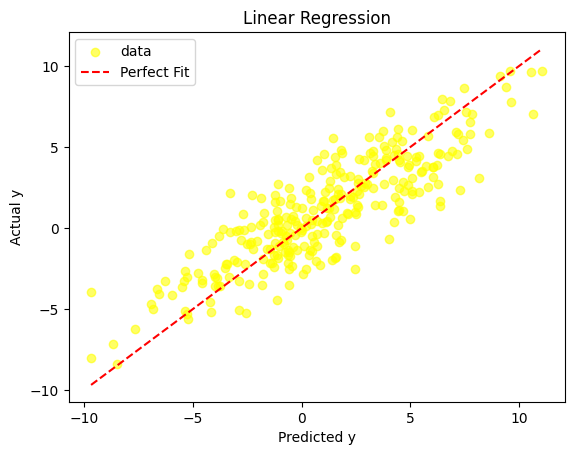

Linear Regression Coefficients: [1.92069735 2.93182021]
Linear Regression Intercept: 1.1624830412053857


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

np.random.seed(42)
x1 = np.random.normal(size=300)
x2 = np.random.normal(size=300)
error = 2 * np.random.normal(size=300)
y1 = 1 + (2 * x1) + (3 * x2) + error

x = np.column_stack((x1, x2)) #Stack 1-D arrays as columns into a 2-D array.

lr = LinearRegression()
lr.fit(x, y1)
lr_pred_y1 = lr.predict(x)

plt.figure()
plt.scatter(y1, lr_pred_y1, color = 'yellow', label = 'data', alpha = 0.6)
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.legend()
plt.title('Linear Regression')
plt.show()

print("Linear Regression Coefficients:", lr.coef_)
print("Linear Regression Intercept:", lr.intercept_)

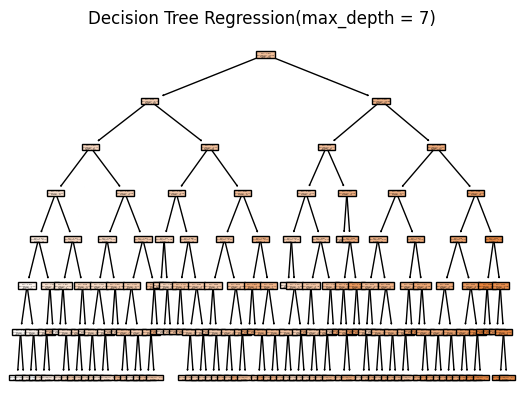

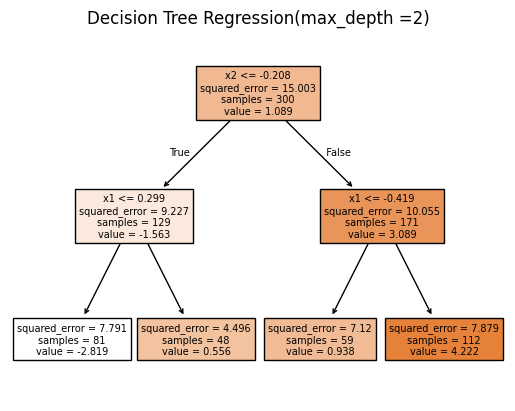

In [3]:
dtr = DecisionTreeRegressor(max_depth = 7, random_state = 42) #fully fit, if I will get more depth(10, 15) it will be the same as 7
dtr2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)

dtr.fit(x, y1)
dtr2.fit(x, y1)

dtr_pred_y1 = dtr.predict(x)
dtr_pred_y1_2 = dtr2.predict(x)

plt.figure()
plot_tree(dtr, feature_names = ['x1', 'x2'], filled = True)
plt.title('Decision Tree Regression(max_depth = 7)')
plt.show()

plt.figure()
plot_tree(dtr2, feature_names = ['x1', 'x2'], filled = True)
plt.title('Decision Tree Regression(max_depth =2)')
plt.show()

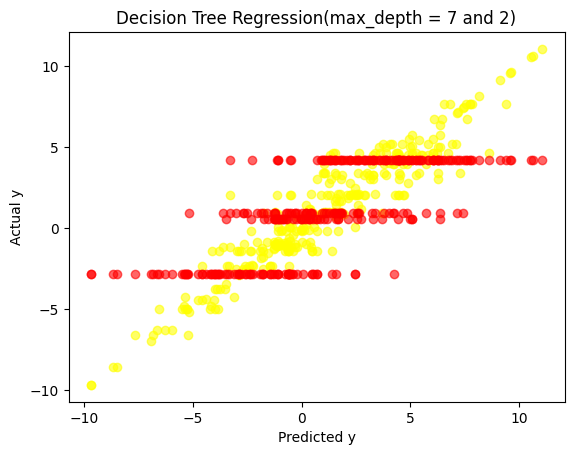

In [4]:
plt.figure()
plt.scatter(y1, dtr_pred_y1, color = 'yellow', alpha = 0.6)
plt.scatter(y1, dtr_pred_y1_2, color = 'red', alpha = 0.6)
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.title('Decision Tree Regression(max_depth = 7 and 2)')
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y1, lr_pred_y1)
mse_drt = mean_squared_error(y1, dtr_pred_y1)
mse_drt2 = mean_squared_error(y1, dtr_pred_y1_2)


print(f"Linear Regression MSE: {mse_lr:.3f}")
print(f"Regression Tree MSE(depth=7): {mse_drt:.3f}")
print(f"Regression Tree MSE(depth=2): {mse_drt2:.3f}")


Linear Regression MSE: 3.950
Regression Tree MSE(depth=7): 1.517
Regression Tree MSE(depth=2): 7.165


# 📊 Regression Models: Linear vs. Trees

## 🔍 Summary

| Model                     | MSE    | Notes                                                       |
|--------------------------|--------|-------------------------------------------------------------|
| **Linear Regression**     | 3.950  | True model is linear, but sensitive to strong noise         |
| **Tree (depth=7)**        | 1.517  | Performs surprisingly well — likely overfits to noise       |
| **Tree (depth=2)**        | 7.165  | Too simple — underfits and misses structure                 |

---

## 🤔 Why does the deeper tree (depth=7) beat linear regression?

1. **Strong Noise**: `noise = 2 * np.random.normal()` — large variance
2. **Overfitting Advantage**: Tree may latch onto noise patterns that reduce in-sample error
3. **Metrics ≠ Generalisation**: Lower MSE here doesn’t mean it generalises better

---

## ✅ Takeaways

- Use **Linear Regression** when the true function is **linear + additive**.
- **Trees can outperform** in-sample, especially deeper ones — but risk overfitting.
- Always **validate** on unseen data to avoid being fooled by lucky fits.



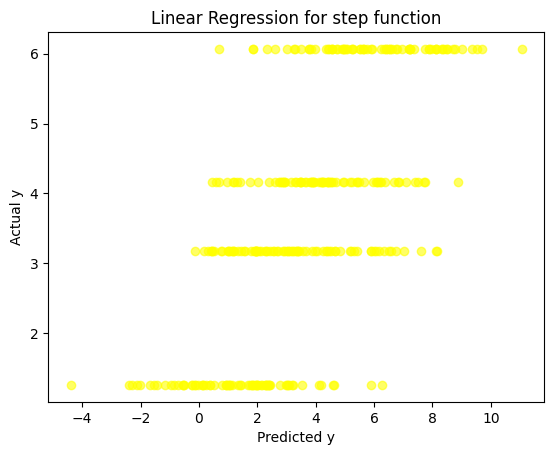

In [6]:
x11 = (x1 > 0).astype(int)
x22 = (x2 > 0).astype(int)

y = 1 + (2 * x11) + (3 * x22) + error
x00 = np.column_stack((x11, x22))

lr_sf = LinearRegression()
lr_sf.fit(x00, y)
lr_sf_pred_y = lr_sf.predict(x00)
plt.figure()
plt.scatter(y, lr_sf_pred_y, color = 'yellow', label = 'data', alpha = 0.6)
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.title('Linear Regression for step function')
plt.show()


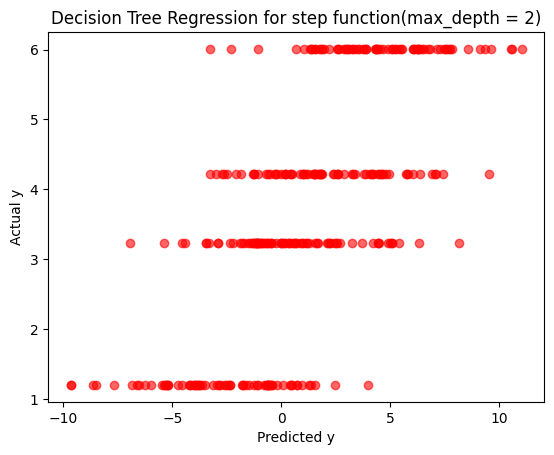

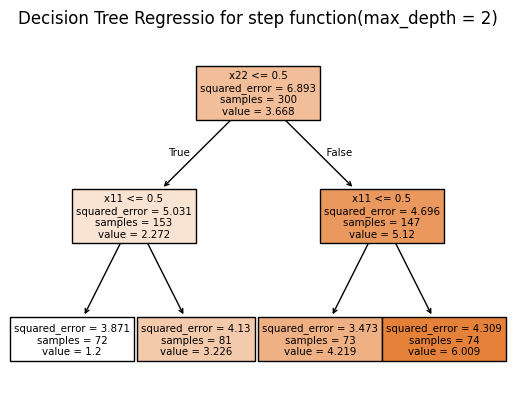

In [7]:
dtr_sf = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dtr_sf.fit(x00, y)
dtr_sf_pred_y = dtr_sf.predict(x00)
plt.figure()
plt.scatter(y1, dtr_sf_pred_y, color = 'red', alpha = 0.6)
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.title('Decision Tree Regression for step function(max_depth = 2)')
plt.show()

plt.figure()
plot_tree(dtr_sf, feature_names = ['x11', 'x22'], filled = True)
plt.title('Decision Tree Regressio for step function(max_depth = 2)')
plt.show()


In [8]:
mse_lr_sf = mean_squared_error(y, lr_sf_pred_y)
mse_drt_sf = mean_squared_error(y, dtr_sf_pred_y)

print(f"Linear Regression MSE: {mse_lr_sf:.3f}")
print(f"Regression Tree MSE(depth=2): {mse_drt_sf:.3f}")

Linear Regression MSE: 3.956
Regression Tree MSE(depth=2): 3.952


## 🧠 Interpretation: Binary Inputs & Stepwise Output

### Setup
- Inputs: Two binary features → (0,0), (0,1), (1,0), (1,1)
- Output: Stepwise function of these combinations

---

## 🔍 Model Behaviour

### ✅ Linear Regression
- Tries to fit a **plane** over stepwise data
- Works *okay* since there are only 4 combinations
- Doesn’t capture the step structure explicitly

### ✅ Regression Tree (Depth=2)
- **Perfect match** for this structure
- Splits:
  - `if x1 > 0`
  - `if x2 > 0`
- Fits the **mean y** in each region
- Depth=2 is enough to split all 4 combinations

---

## 🎯 Conclusion
- For **stepwise + additive** functions with **binary inputs**, regression trees are ideal.
- Linear regression performs similarly but lacks clear logic modeling.


# CART and Gini Index


### Overview and Dataset
In this notebook, we will use a **Decision Tree** classifier to predict the **Tax_Regime** (Exempt, Flat, or Progressive) for various entities (companies/individuals), given their **Country**, **Industry**, **Annual_Income**, and **Number_of_Employees**. 

We will also explore how **Gini impurity** guides the tree's splitting decisions.


## Part 1: Gini Impurity and Manual Split Calculations

### Task - 1 Compute the Root Gini Impurity
    Understand the dataset and find interesting patterns :
        - Calculate the overall Gini of the target variable (Tax_Regime) for the entire dataset
        - Show your formula and numerical steps for first 10-15 rows

### Count Frequencies of `Tax_Regime`

From the first 10 rows:

| Tax_Regime  | Count |
|-------------|-------|
| Progressive | 4     |
| Flat        | 4     |
| Exempt      | 2     |
| **Total**   | 10    |

---

### Compute Gini Impurity

Using the Gini formula:
$$
Gini = 1 - \sum p_i^2
$$
Where:
$$
p(\text{Progressive}) = \frac{4}{10} = 0.4
$$
$$
p(\text{Flat}) = \frac{4}{10} = 0.4
$$
$$
p(\text{Exempt}) = \frac{2}{10} = 0.2
$$
$$
Gini = 1 - (0.4^2 + 0.4^2 + 0.2^2) \\
= 1 - (0.16 + 0.16 + 0.04) \\
= 1 - 0.36 = 0.64
$$

---

### Final Answer

> **Root Gini Impurity = 0.64**


### Task 2 – Split by One Feature
    Understand the dataset and find interesting patterns :
        - Choose one feature (e.g., Annual_Income, Employees, or a categorical column) to perform a manual split
            - If numeric (e.g., Annual_Income): pick a threshold (e.g., s < 60000 vs. s >= 60000)
            - If categorical (e.g., Country): pick some subset of countries vs. the others 
        - Separate the dataset into two subsets and compute the Gini impurity for each subset

In [9]:
df = pd.read_csv("tax_data.csv")

df_low_income = df[df['Annual_Income'] < 60000]
df_high_income = df[df['Annual_Income'] >= 60000]

def gini_impurity(df, column):
    proportions = df[column].value_counts(normalize=True)
    gini = 1 - sum(proportions ** 2)
    return gini

gini_low_income = gini_impurity(df_low_income, 'Tax_Regime')
gini_high_income = gini_impurity(df_high_income, 'Tax_Regime')

gini_low_income, gini_high_income

(0.49777777777777776, 0.44907197827071077)

### Task 3 - Weighted Average Gini After Split


$$
G(t) = p_l \cdot G(t_l) + p_r \cdot G(t_r)
$$
where :
- $  G(t)  $ : Represents the **Gini impurity of the split** at a node $  t  $ .
- $  p_l  $ : Proportion of samples in the **left child** ($  t_l  $ ).
- $  G(t_l)  $ : Gini impurity of the left child.
- $  p_r  $ : Proportion of samples in the **right child** ($  t_r  $ ).
- $  G(t_r)  $ : Gini impurity of the right child.



Compare this to the root Gini impurity and discuss if the reduction is significant

In [10]:
total_samples = 80
left_child_samples = 43
right_child_samples = 37

G_left = 0.49777777777777776
G_right = 0.44907197827071077

p_left = left_child_samples / total_samples
p_right = right_child_samples / total_samples

G_t = p_left * G_left + p_right * G_right
G_t


0.4752513455057593

If the root Gini impurity was higher than **0.47525134**, the reduction in Gini impurity after the split is significant, meaning the split improved the purity of the subsets.

If the root Gini impurity was already close to or lower than **0.47525134**, the reduction is not as significant.


## Part 2: Building and Evaluating a Decision Tree

### Task 1 - Data Preparation
Prepare the data as usual :

    - Do some data analysis (they should be insighful for the problem)
    - For categorical features (Country, Industry), convert them to dummy variables
    - Split off the target
    - Create a 70/30 train-test split

In [35]:

from sklearn.model_selection import train_test_split

print("Basic Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

print("\nValue Counts:")
print("\nCountry:\n", df['Country'].value_counts())
print("\nIndustry:\n", df['Industry'].value_counts())
print("\nTax_Regime:\n", df['Tax_Regime'].value_counts())

df_encoded = pd.get_dummies(df, columns=['Country', 'Industry'], drop_first=True)

x = df_encoded.drop('Tax_Regime', axis=1)
y = df['Tax_Regime']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nX_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        107 non-null    object
 1   Industry       107 non-null    object
 2   Annual_Income  107 non-null    int64 
 3   Employees      107 non-null    int64 
 4   Tax_Regime     107 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.3+ KB
Basic Info:
 None

Summary Statistics:
        Annual_Income   Employees
count     107.000000  107.000000
mean    59018.691589    6.691589
std     33941.120302    5.180535
min     10000.000000    1.000000
25%     29000.000000    2.000000
50%     50000.000000    5.000000
75%     87500.000000   10.000000
max    150000.000000   20.000000

Value Counts:

Country:
 Country
India           10
China           10
Mexico          10
Brazil          10
South_Africa    10
Australia        9
Canada           8
USA              8
Germany          8
UK 

### Task 2 - Decision Tree Classifier with Gini
    - Initialize and fit
    - Tune hyperparameters like max_depth, min_samples_leaf, etc

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt_cl = DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=4, min_samples_leaf=4)
dt_cl.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=4)

### Task 3 - Predictions and Evaluation
    - Predict on the test set
    - Calculate and analyse different classification metrics

In [45]:
y_pred = dt_cl.predict(x_test)
#Which scoring function should I use?
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.8484848484848485
Confusion Matrix:
 [[10  0  0]
 [ 3 11  0]
 [ 0  2  7]]
Classification Report:
               precision    recall  f1-score   support

      Exempt       0.77      1.00      0.87        10
        Flat       0.85      0.79      0.81        14
 Progressive       1.00      0.78      0.88         9

    accuracy                           0.85        33
   macro avg       0.87      0.85      0.85        33
weighted avg       0.86      0.85      0.85        33



### Task 4 - Tree Structure
    - Plot and check out how is the tree splitting
    - Compare the top splits with your manual Gini analysis from Part 1
    - Re train with different max_depth values and compare
    - Discuss what are the pro and cons of growing a deep Tree
    - Remember what is the variance of an estimator. Discuss why the variance of a decision tree might be large. Find a way to vizualize it.

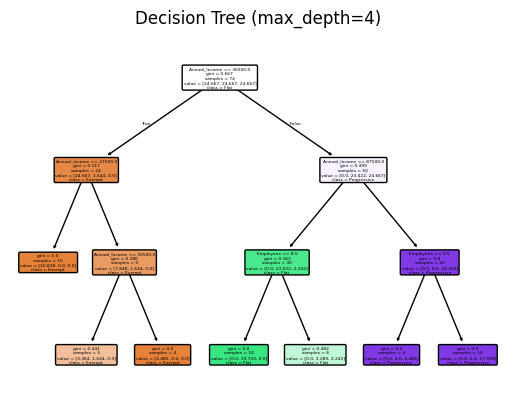

In [46]:
plt.figure
plot_tree(dt_cl,
          feature_names=x.columns,
          class_names=dt_cl.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree (max_depth=4)")
plt.show()


In [47]:
depths = [2, 4, 6, None]  #None = full depth
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, class_weight='balanced', min_samples_leaf=5)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Depth={d}, Accuracy={acc:.3f}")


Depth=2, Accuracy=0.848
Depth=4, Accuracy=0.848
Depth=6, Accuracy=0.848
Depth=None, Accuracy=0.848


### Step 3: Discuss Deep Trees

#### Pros of Deep Trees:
- Capture complex patterns
- Lower bias

#### Cons of Deep Trees:
- Very high variance
- Sensitive to noise (overfit)
- Less interpretable


### Step 4: Understand Variance in Decision Trees

**Variance** = How much predictions change with different training data.

A decision tree has **high variance** because:
- A small change in data → totally different tree
- No averaging is done (like in ensemble methods)
